Observations
1. Ketapril resulted in the greatest increases in tumor volume size during the period, and also had the highest number of metastatic site increases. Though it wasn't always the lowest performer, it is clear that overall, Ketapril was among the worst performing drugs. 
2. In terms of tumor volume reduction, survival rate and number of metastatic site occurences, Capomulin was the best performing drug. In certain metrics, Capomulin was outperformed, but it had the overall best performance when taking all into account.
3. Both Propriva and Infubinol saw the lowest survival rates of the drugs tested and even lower than even the placebo, suggesting a clear relationship between use and accelerated increased mortality rates. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
clinicaltrial_data_csv = "/Users/ZGS/Documents/Data_Bootcamp/matplotlib_homework/Pymaceuticals/raw_data/clinicaltrial_data.csv"
mouse_drug_data_csv = "/Users/ZGS/Documents/Data_Bootcamp/matplotlib_homework/Pymaceuticals/raw_data/mouse_drug_data.csv"

In [3]:
trials_df = pd.read_csv(clinicaltrial_data_csv)
mouse_df = pd.read_csv(mouse_drug_data_csv)

In [4]:
trials_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
combined_df = trials_df.merge(mouse_df, on='Mouse ID')

In [7]:
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [8]:
combined_df.Drug.unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [9]:
combined_df["Metastatic Sites"].unique()

array([0, 1, 2, 3, 4])

In [10]:
#scatter plot that shows how the tumor volume changes over time for each treatment.
volume_avg = pd.DataFrame(combined_df.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']).unstack(level = 0)
volume_sem = pd.DataFrame(combined_df.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)']).unstack(level = 0)

In [11]:
volume_avg.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

In [12]:
volume_sem.head()

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182

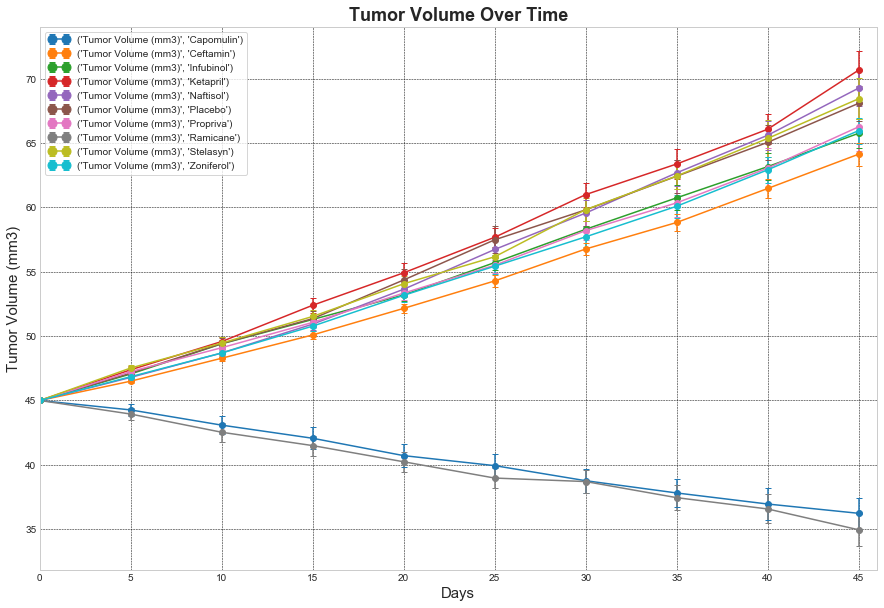

In [262]:
plt.figure(figsize = (15,10))
plt.title('Tumor Volume Over Time', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Tumor Volume (mm3)', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0, volume_avg.index.max()+3 , 5)) # location of separators for timepoint
plt.xlim(0, volume_avg.index.max() + 1)

markers = ['o', 's', '^', 'd']

xvals = volume_avg.index
count = 0
for c in volume_avg.columns:
    plt.errorbar(xvals,
                 volume_avg[c],
                 volume_sem[c],
                 marker =  markers[count],
                 capthick = 1, #for caps on error bars
                 capsize = 3)  # for caps on error bars
count += 1

legend = plt.legend(numpoints = 2, # gives two symbols in legend
    frameon = True,
    markerscale = 1.5)

plt.show()

In [15]:
# Metastatic Site changes over time for each treatment
number_spread = pd.DataFrame(combined_df.groupby(['Drug','Timepoint']).mean()['Metastatic Sites']).unstack(level = 0)
number_spread_error = pd.DataFrame(combined_df.groupby(['Drug','Timepoint']).sem()['Metastatic Sites']).unstack(level = 0)

In [263]:
number_spread.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

In [264]:
number_spread_error.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

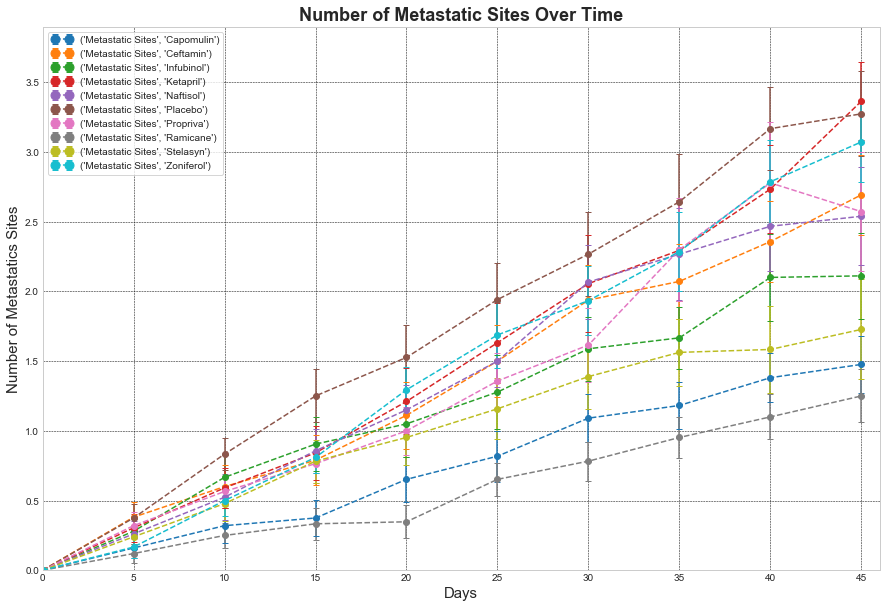

In [267]:
plt.figure(figsize = (15,10))
plt.title('Number of Metastatic Sites Over Time', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Number of Metastatics Sites', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0,number_spread.index.max() + 3 ,5))
plt.xlim(0, number_spread.index.max()+1)
plt.ylim(0, number_spread.max().max() + number_spread_error.max().max() + .1)

count = 0
xvals = number_spread.index
for c in number_spread:
    plt.errorbar(xvals,
                number_spread[c],
                number_spread_error[c],
                linestyle = '--',
                marker =  markers[count],
                capthick = 1,
                capsize = 3)
                                  
count += 1
legend = plt.legend(numpoints = 2,
                frameon = True,
                markerscale = 1.5)
plt.show()

In [268]:
#Mice survival rate during treatment
number_mice = combined_df.groupby(['Drug','Timepoint']).count()['Mouse ID'].unstack(level = 0)

In [269]:
number_mice

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


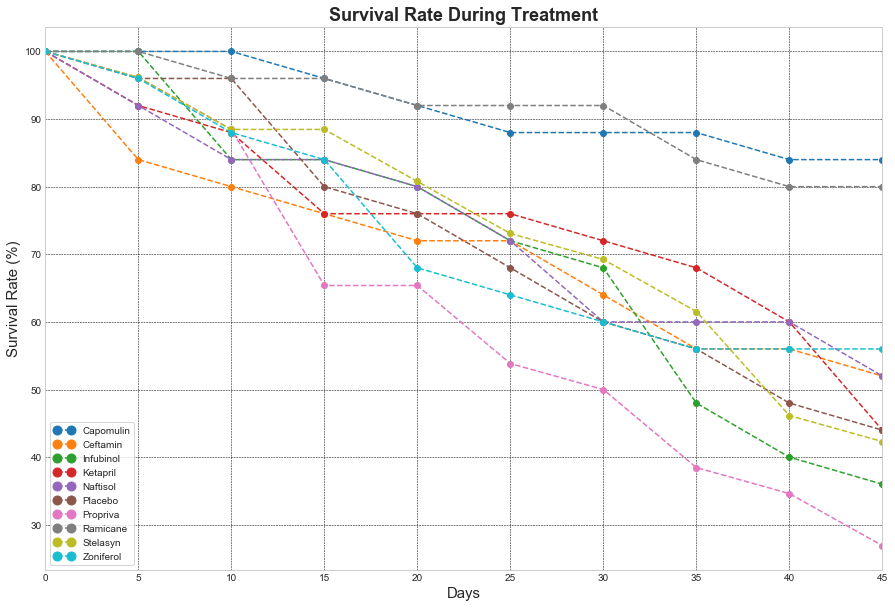

In [271]:
plt.figure(figsize = (15,10))
plt.title('Survival Rate During Treatment', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Survival Rate (%)', fontdict = {'fontsize': 15})
plt.xlim(0, number_mice.index.max())
xvals = number_mice.index
count = 0
for c in number_mice:
    yvals = number_mice[c]/number_mice.loc[0,c] * 100
    plt.plot(xvals,
             yvals,
             linestyle = '--',
             marker =  markers[count],
             )
count += 1
#legend options
lg = plt.legend(numpoints = 2,
                frameon = True,
                markerscale = 1.5)
plt.show()

In [253]:
#bar graph that compares the total % tumor volume change for each drug across the full 45 days.
tumor_change = ((volume_avg.loc[45, :] - volume_avg.loc[0, :])/volume_avg.loc[0, :] * 100).reset_index()
tumor_change_drug = ((volume_avg.loc[45, :] - volume_avg.loc[0, :])/volume_avg.loc[0, :] * 100).reset_index()['Drug']

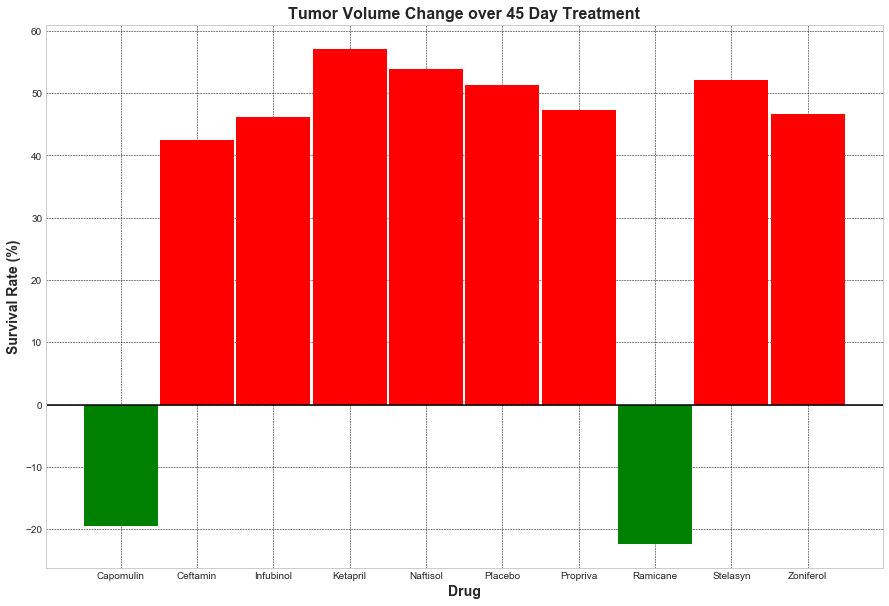

In [272]:
y = list(tumor_change[0])
x = list(tumor_change['Drug'])

plt.figure(figsize = (15,10))
plt.title('Tumor Volume Change over 45 Day Treatment', fontdict = {'fontsize': 16, 'fontweight': 'bold'})
plt.ylabel('Survival Rate (%)',fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Drug',fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
width = 15/15.5

plt.bar(x, y, width, color=['red' if y >=0 else 'green' for y in y])

plt.show()